# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587SP19 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587SP19issues.json

In [100]:
import os
#import cPickle as pickle

import pandas as pd 
from fbprophet import Prophet    # panda's nickname is pd
   

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt



%matplotlib inline

#  



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [101]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP19issues.json')]

In [102]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [103]:
# Sanity test: print first 10 rows in our DataFrame

issues_df
#issues_df.head()

,Author,State,closed_at,created_at,issue_number,labels
0,TSP19SCM781,open,None,2019-04-21,494,"[Category:Enhancement, DetectionPhase:Testing,..."
1,TSP19SCM781,open,None,2019-04-21,493,"[Category:Enhancement, DetectionPhase:Design, ..."
2,TSP19SCM781,open,None,2019-04-21,492,"[Category:Inquiry, DetectionPhase:Design, Orig..."
3,DSP19SCM782,open,None,2019-04-21,491,"[Category:Bug, DetectionPhase:Field, Originati..."
4,DSP19SCM782,open,None,2019-04-21,490,"[Category:Bug, DetectionPhase:Design, Originat..."
5,DSP19SCM781,open,None,2019-04-21,489,"[Category:Enhancement, DetectionPhase:Coding, ..."
6,DSP19SCM781,open,None,2019-04-21,488,"[Category:Bug, DetectionPhase:Testing, Origina..."
7,DSP19SCM781,open,None,2019-04-21,487,"[Category:Inquiry, DetectionPhase:Design, Orig..."
8,SSP19SCM781,open,None,2019-04-20,486,"[Category:Enhancement, DetectionPhase:Design, ..."
9,SSP19SCM781,open,None,2019-04-20,485,"[Category:Enhancement, DetectionPhase:Field, O..."


In [104]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [105]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,TSP19SCM781,open,None,2019-04-21,494,"[Category:Enhancement, DetectionPhase:Testing,...",NaN,NaN,NaN,NaN,NaN
1,TSP19SCM781,open,None,2019-04-21,493,"[Category:Enhancement, DetectionPhase:Design, ...",NaN,NaN,NaN,NaN,NaN
2,TSP19SCM781,open,None,2019-04-21,492,"[Category:Inquiry, DetectionPhase:Design, Orig...",NaN,NaN,NaN,NaN,NaN
3,DSP19SCM782,open,None,2019-04-21,491,"[Category:Bug, DetectionPhase:Field, Originati...",NaN,NaN,NaN,NaN,NaN
4,DSP19SCM782,open,None,2019-04-21,490,"[Category:Bug, DetectionPhase:Design, Originat...",NaN,NaN,NaN,NaN,NaN
5,DSP19SCM781,open,None,2019-04-21,489,"[Category:Enhancement, DetectionPhase:Coding, ...",NaN,NaN,NaN,NaN,NaN
6,DSP19SCM781,open,None,2019-04-21,488,"[Category:Bug, DetectionPhase:Testing, Origina...",NaN,NaN,NaN,NaN,NaN
7,DSP19SCM781,open,None,2019-04-21,487,"[Category:Inquiry, DetectionPhase:Design, Orig...",NaN,NaN,NaN,NaN,NaN
8,SSP19SCM781,open,None,2019-04-20,486,"[Category:Enhancement, DetectionPhase:Design, ...",NaN,NaN,NaN,NaN,NaN
9,SSP19SCM781,open,None,2019-04-20,485,"[Category:Enhancement, DetectionPhase:Field, O...",NaN,NaN,NaN,NaN,NaN


In [106]:
for i in range(0, len(wrangled_issues_df)):
   if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            label_name= (label.split(':'))[0]
            label_value= (label.split(':'))[1]
            wrangled_issues_df.loc[i, label_name]=label_value
 

In [107]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status,Address,OritinationPhase,Latitude,Longitude,Detection,Origination
0,TSP19SCM781,open,None,2019-04-21,494,"[Category:Enhancement, DetectionPhase:Testing,...",Field,Testing,Enhancement,Critical,Completed,NaN,NaN,NaN,NaN,NaN,NaN
1,TSP19SCM781,open,None,2019-04-21,493,"[Category:Enhancement, DetectionPhase:Design, ...",Design,Design,Enhancement,Major,Completed,NaN,NaN,NaN,NaN,NaN,NaN
2,TSP19SCM781,open,None,2019-04-21,492,"[Category:Inquiry, DetectionPhase:Design, Orig...",Requirements,Design,Inquiry,Major,inProgress,NaN,NaN,NaN,NaN,NaN,NaN
3,DSP19SCM782,open,None,2019-04-21,491,"[Category:Bug, DetectionPhase:Field, Originati...",Field,Field,Bug,Major,pendingReview,NaN,NaN,NaN,NaN,NaN,NaN
4,DSP19SCM782,open,None,2019-04-21,490,"[Category:Bug, DetectionPhase:Design, Originat...",Testing,Design,Bug,High,pendingReview,NaN,NaN,NaN,NaN,NaN,NaN
5,DSP19SCM781,open,None,2019-04-21,489,"[Category:Enhancement, DetectionPhase:Coding, ...",Requirements,Coding,Enhancement,Low,Completed,NaN,NaN,NaN,NaN,NaN,NaN
6,DSP19SCM781,open,None,2019-04-21,488,"[Category:Bug, DetectionPhase:Testing, Origina...",Field,Testing,Bug,Low,Rejected,NaN,NaN,NaN,NaN,NaN,NaN
7,DSP19SCM781,open,None,2019-04-21,487,"[Category:Inquiry, DetectionPhase:Design, Orig...",Documentation,Design,Inquiry,Major,pendingReview,NaN,NaN,NaN,NaN,NaN,NaN
8,SSP19SCM781,open,None,2019-04-20,486,"[Category:Enhancement, DetectionPhase:Design, ...",Testing,Design,Enhancement,Medium,pendingReview,NaN,NaN,NaN,NaN,NaN,NaN
9,SSP19SCM781,open,None,2019-04-20,485,"[Category:Enhancement, DetectionPhase:Field, O...",Testing,Field,Enhancement,Critical,Approved,NaN,NaN,NaN,NaN,NaN,NaN


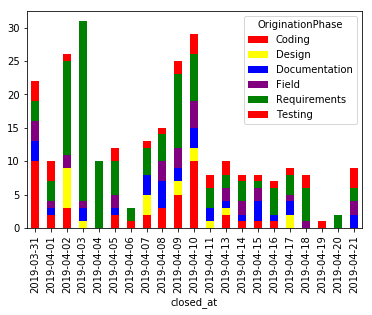

In [108]:
# Plot in Bar Chart the total number of issues "closed" every day for every Origination Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','OriginationPhase']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green'], grid=False)

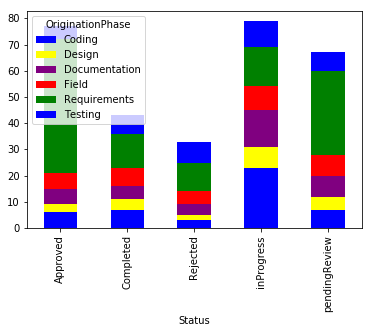

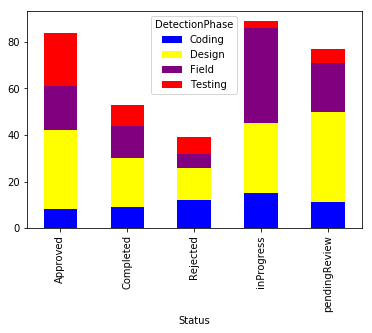

In [109]:
# Plot in Bar Chart the total number of issues created for every Phase based on their Status

LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','OriginationPhase']).created_at.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','DetectionPhase']).created_at.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

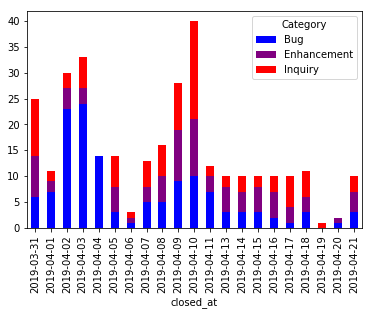

In [110]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green'], grid=False)


# Plot in Bar Chart the total number of issues for 1) DetectionPhase is Field AND Priority is Critical

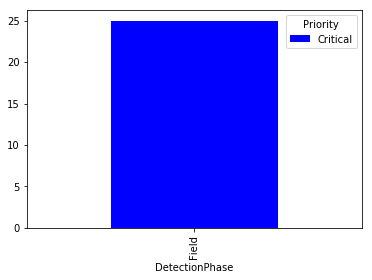

In [111]:


a = wrangled_issues_df[(wrangled_issues_df['DetectionPhase']=='Field') & (wrangled_issues_df['Priority']=='Critical')]
LabelsReviewedByDate =a.groupby(['DetectionPhase','Priority']).created_at.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green'], grid=False)
#plt.bar(x,height=0.8)
#plt.bar(x, height=0.5, width=0.8)
#x_axis = [a,b,c]
#y_axis = [2, 8, 10]
#plt.bar(a, y_axis)
#plt.bar(range(1,len(a)+1), a, tick_label=a)
#dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red'], grid=False)

# DetectionPhase is Field AND Status is Completed

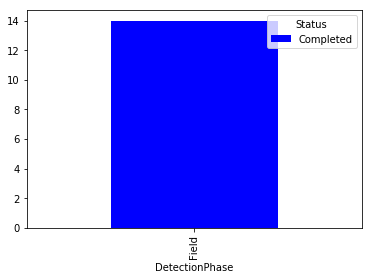

In [112]:
b = wrangled_issues_df[(wrangled_issues_df['DetectionPhase']=='Field') & (wrangled_issues_df['Status']=='Completed')]
LabelsReviewedByDate =b.groupby(['DetectionPhase','Status']).created_at.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green'], grid=False)

# DetectionPhase is Field AND Priority is Critical AND Status is Approved


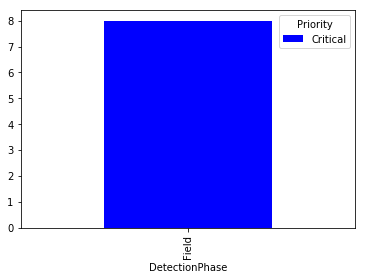

In [113]:
c = wrangled_issues_df[(wrangled_issues_df['DetectionPhase']=='Field') & (wrangled_issues_df['Priority']=='Critical') & (wrangled_issues_df['Status']=='Approved')]
LabelsReviewedByDate =c.groupby(['DetectionPhase','Priority']).created_at.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green'], grid=False)

# DetectionPhase is Field AND Priority is Critical or High AND Status is Approved or inProgress

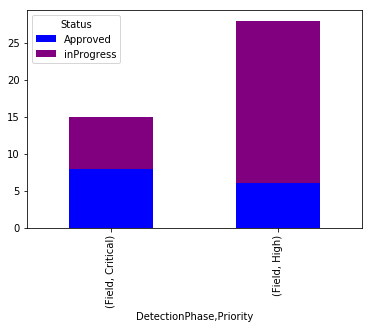

In [114]:
#wrangled_issues_df[(wrangled_issues_df['DetectionPhase']=='Field') & (wrangled_issues_df['Priority']=='Critical') | (wrangled_issues_df['Priority']=='High') & (wrangled_issues_df['Status']=='Approved') | (wrangled_issues_df['Status']=='inProgress')]
d = wrangled_issues_df[(wrangled_issues_df['DetectionPhase']=='Field') & ((wrangled_issues_df['Priority']=='Critical') | (wrangled_issues_df['Priority']=='High')) & ((wrangled_issues_df['Status']=='Approved') | (wrangled_issues_df['Status']=='inProgress'))]
LabelsReviewedByDate =d.groupby(['DetectionPhase','Priority','Status']).created_at.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green'], grid=False)